In [1]:
import typing

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import accuracy_score

%matplotlib inline


def reachedConvergence(x: np.ndarray, x_estimate: np.ndarray, grad_x0: np.ndarray, 
                       grad_x: np.ndarray, tolf: float, tolx: float) -> bool:
    if np.linalg.norm(x_estimate - x, ord=2) < tolx:
        return True
    
    if np.linalg.norm(grad_x, ord=2) < tolf * np.linalg.norm(grad_x0, ord=2):
        return True
    
    return False


def backtracking(f, grad_f, x):
    """
    This function is a simple implementation of the backtracking algorithm for
    the GD (Gradient Descent) method.
    
    f: function. The function that we want to optimize.
    grad_f: function. The gradient of f(x).
    x: ndarray. The actual iterate x_k.
    """
    alpha = 1
    c = 0.8
    tau = 0.25
    
    while f(x - alpha * grad_f(x)) > f(x) - c * alpha * np.linalg.norm(grad_f(x), 2) ** 2:
        alpha = tau * alpha
        
        if alpha < 1e-3:
            break
    return alpha

def gradientDescent(x: np.ndarray, f_x: typing.Callable, f_prime_x: typing.Callable, 
                    alpha: float = 1e-3, kmax: int = 500, tolf: float = 1e-6, tolx: float = 1e-6, 
                    use_backtracking: bool = False, verbose: bool = False):
    x_estimates = np.zeros((kmax + 1, x.shape[1]), dtype=np.float32)
    x_estimates[0, :] = x
    k = None
    f_vals = np.zeros((kmax,), dtype=np.float32)
    grads = np.zeros((kmax, x.shape[1]), dtype=np.float32)
    errs = np.zeros((kmax,), dtype=np.float32)
    
    for i in range(kmax):
        if (i + 1) % 100 == 0 and verbose:
            print("Running iteration %d" % (i + 1))
        f_vals[i] = f_x(x_estimates[i])
        grads[i] = f_prime_x(x_estimates[i]).reshape(-1)
        errs[i] = np.linalg.norm(grads[i], ord=2)
        
        if use_backtracking:
            alpha = backtracking(f_x, f_prime_x, x_estimates[i, :])
            
        x_estimates[i+1] = x_estimates[i, :] - alpha * grads[i]
        if reachedConvergence(x_estimates[i+1, :], x_estimates[i, :], grads[0],
                              grads[i], tolf, tolx):
            k = i + 1
            return x_estimates[:k+1,:], k, f_vals[:k+1], grads[:k,:], errs[:k]
        
    return x_estimates, k, f_vals, grads, errs


def gradientDescentPlot(f_x: typing.Callable, x_1_range: typing.Tuple[int,int], 
                        x_2_range: typing.Tuple[int,int], step_size: float, 
                        x_estimates: np.ndarray, f_vals: np.ndarray, k, title: str = ""):
    x, y = np.mgrid[x_1_range[0]:x_1_range[1]:step_size, x_2_range[0]:x_2_range[1]:step_size]
    grid = np.empty(x.shape + (2,))
    grid[:, :, 0] = x; grid[:, :, 1] = y
    f_grid = np.zeros((grid.shape[0], grid.shape[1]))
    for i in range(grid.shape[0]):
        for j in range(grid.shape[1]):
            f_grid[i,j] = f_x(grid[i,j])
    
    fig = plt.figure()
    contour_plor = plt.contour(x, y, f_grid)
    plt.clabel(contour_plor, inline=1, fontsize=10)
    line, = plt.plot([], [], lw=2)
    line.set_data(x_estimates[:,0].tolist(), x_estimates[:,1].tolist())
    plt.title(title)
    
    plt.show()

/home/mrcr4ft/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def f_1(x: np.ndarray) -> float:
    y = (x[0] - 3) ** 2 + (x[1] - 1) ** 2
    return y

def f_1_prime(x: np.ndarray) -> np.ndarray:
    y_prime = np.array([2*x[0] - 6, 2*x[1] - 2])
    return y_prime

def f_2(x: np.ndarray) -> float:
    y = 10*(x[0] - 1) ** 2 + (x[1] - 2) ** 2
    return y

def f_2_prime(x: np.ndarray) -> np.ndarray:
    y_prime = np.array([20*x[0] - 20, 2*x[1] - 4])
    return y_prime

def f_3(x: np.ndarray) -> float:
    x = x.copy().reshape(1,-1)
    n = x.shape[1]
    v = np.linspace(start=0, stop=1, num=n)
    A = np.vander(v)
    x_true = np.ones((1,n))
    b = A @ x_true.T
    return 0.5 * np.linalg.norm(A @ x.T - b, ord=2) ** 2

def f_3_prime(x: np.ndarray) -> np.ndarray:
    x = x.copy().reshape(1,-1)
    n = x.shape[1]
    v = np.linspace(start=0, stop=1, num=n)
    A = np.vander(v)
    x_true = np.ones((1,n))
    b = A @ x_true.T
    return A.T @ (A @ x.T - b)

def f_4(x: np.ndarray) -> float:
    l = 1
    x = x.copy().reshape(1,-1)
    n = x.shape[1]
    v = np.linspace(start=0, stop=1, num=n)
    A = np.vander(v)
    x_true = np.ones((1,n))
    b = A @ x_true.T
    return 0.5 * np.linalg.norm(A @ x.T - b, ord=2) ** 2 + l/2 * np.linalg.norm(x, ord=2)**2

def f_4_prime(x: np.ndarray) -> np.ndarray:
    l = 1
    x = x.copy().reshape(1,-1)
    n = x.shape[1]
    v = np.linspace(start=0, stop=1, num=n)
    A = np.vander(v)
    x_true = np.ones((1,n))
    b = A @ x_true.T
    return A.T @ (A @ x.T - b) + l * x.T

def f_5(x: np.ndarray) -> float:
    return x[0]**4 + x[0]**3 - 2*x[0]**2 -2*x[0]

def f_5_prime(x: np.ndarray) -> np.ndarray:
    return np.array([4 * x[0]**3 + 3*x[0]**2 - 4*x[0] - 2]).reshape(-1,1)
    

functions = [(f_1, f_1_prime), (f_2, f_2_prime), (f_3, f_3_prime), (f_4, f_4_prime), (f_5, f_5_prime)]

true_xs_f4 = []
l = 1
for n in [5,15]:
    A = np.vander(np.linspace(start=0, stop=1, num=n))
    x_true = np.ones((1,n))
    b = A @ x_true.T
    true_xs_f4.append((np.linalg.inv(A.T @ A + np.eye(n) * l) @ A.T @ b).T)

f_5_global_min = 0.9222222222

true_xs = [[np.array([[3,1]])], [np.array([[1,2]])], [np.ones((1,5)), np.ones((1,15))], true_xs_f4, [f_5_global_min] * 5]
inputs = [[np.zeros((1,2))], [np.zeros((1,2))], [np.zeros((1,5)), np.zeros((1,15))], [np.zeros((1,5)), np.zeros((1,15))], 
          [np.array([[-3.]]), np.array([[-1.5]]), np.array([[0.]]), np.array([[1.5]]), np.array([[3.]])]]
kmax=100
tolf = tolx = 1e-6
alphas = [1e-1, 5e-3]

Converged in 61 steps


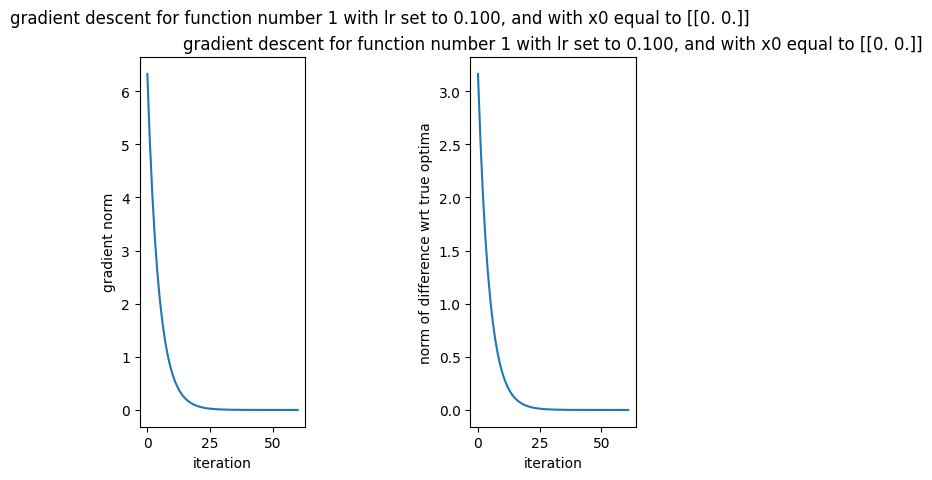

Not converged


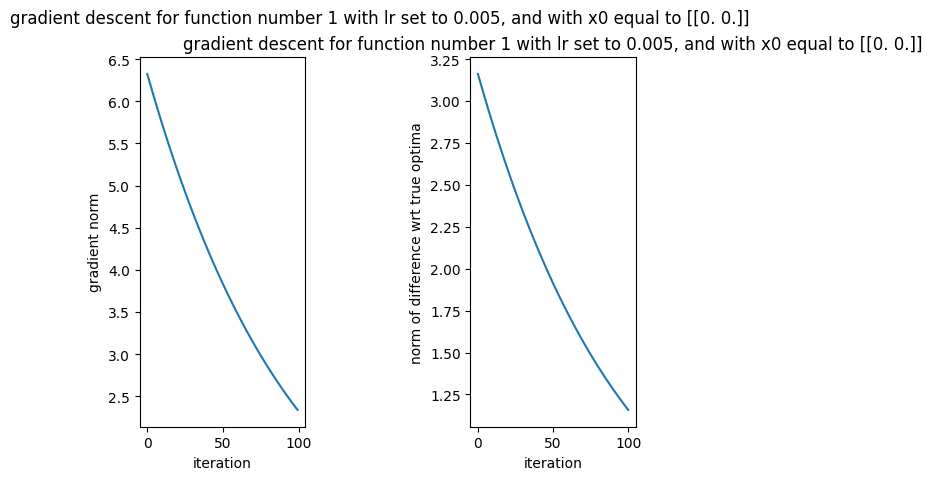

Converged in 98 steps


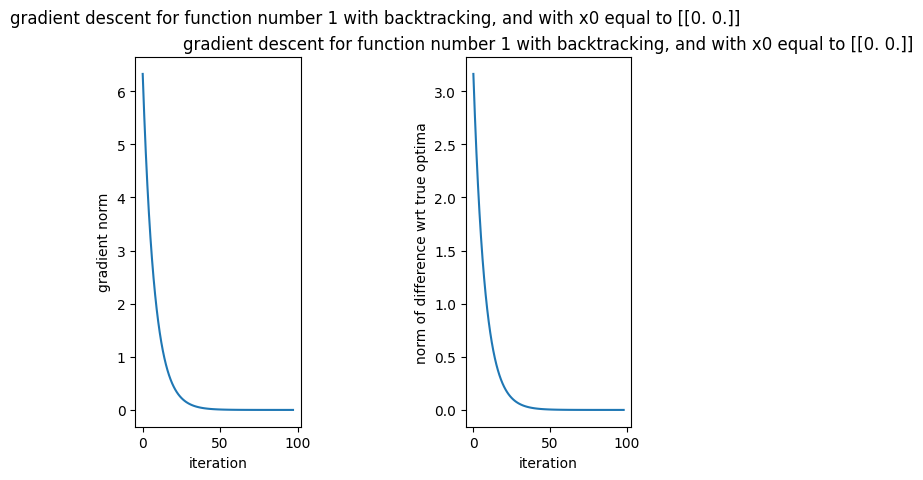

Not converged


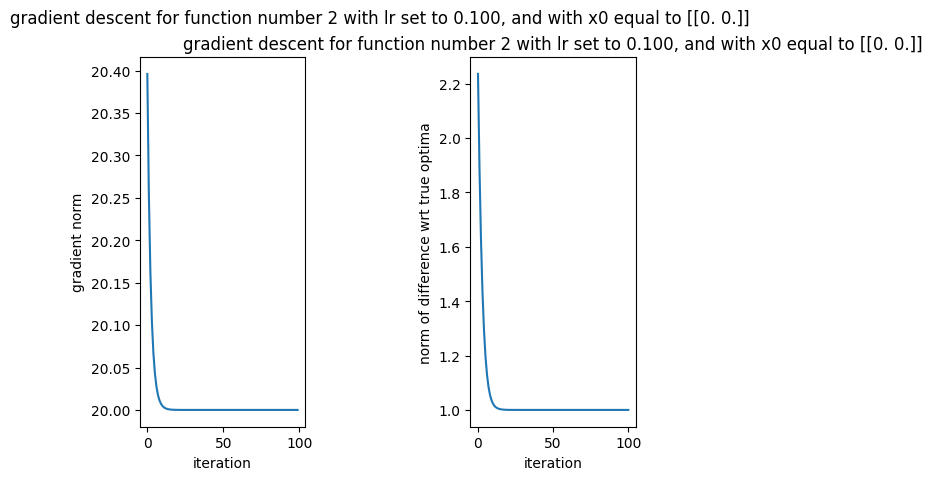

Not converged


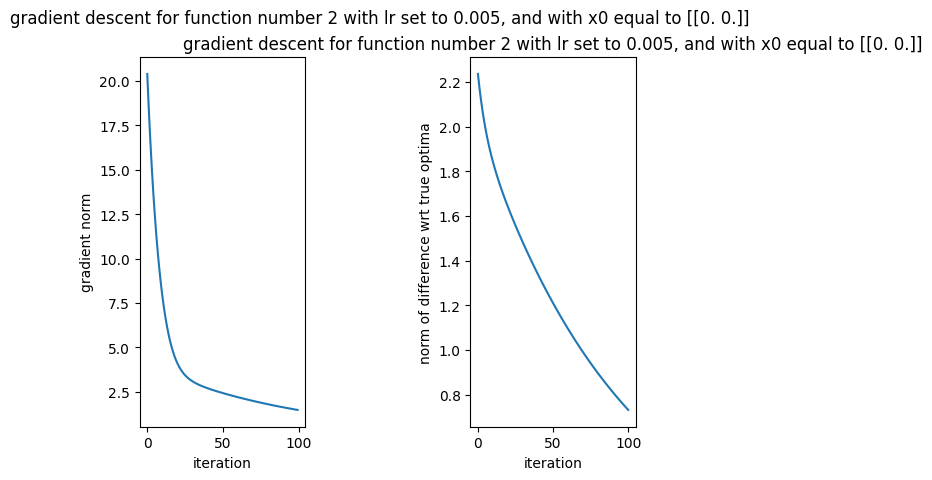

Converged in 98 steps


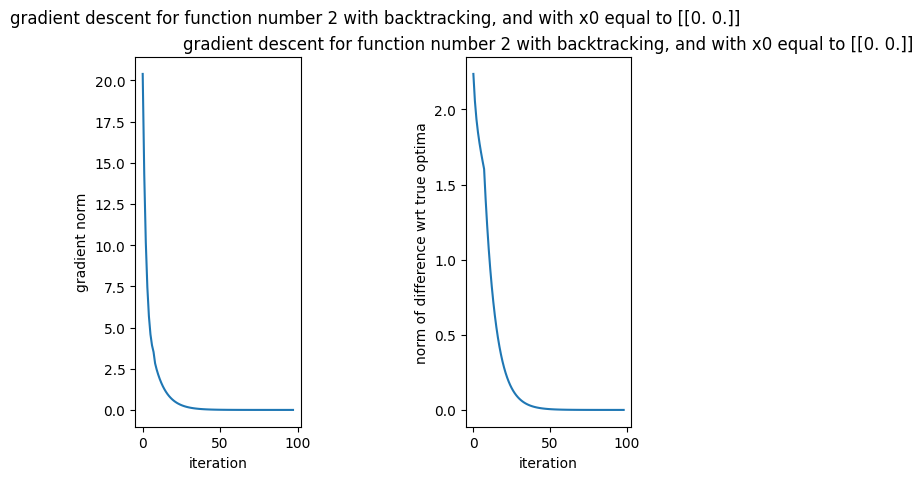

Not converged


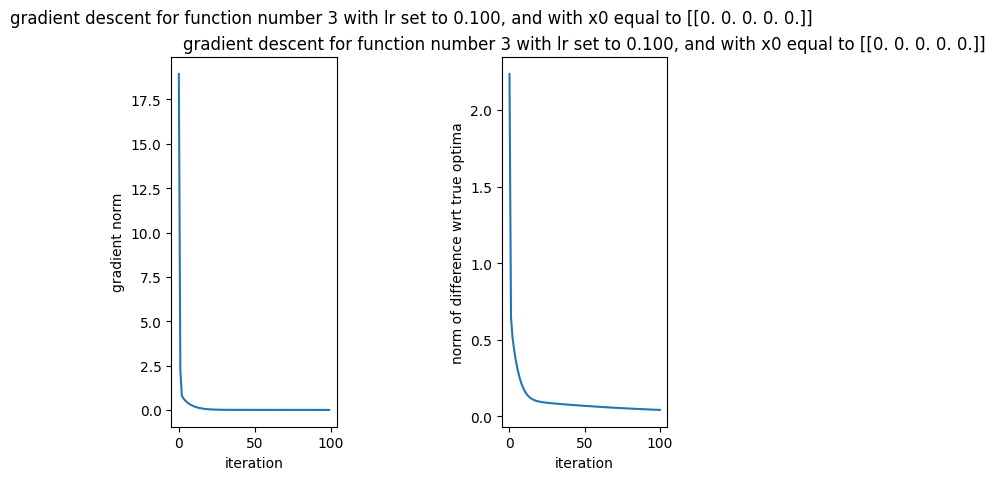

Not converged


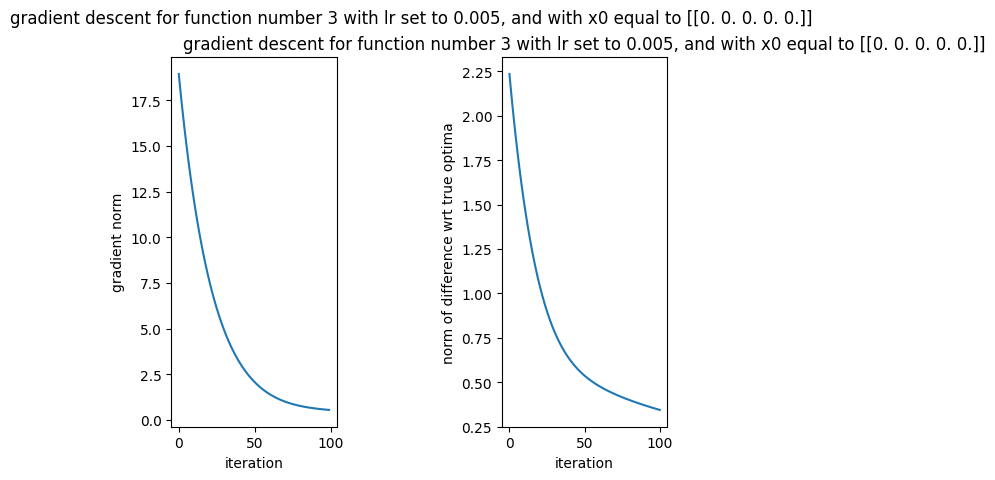

Not converged


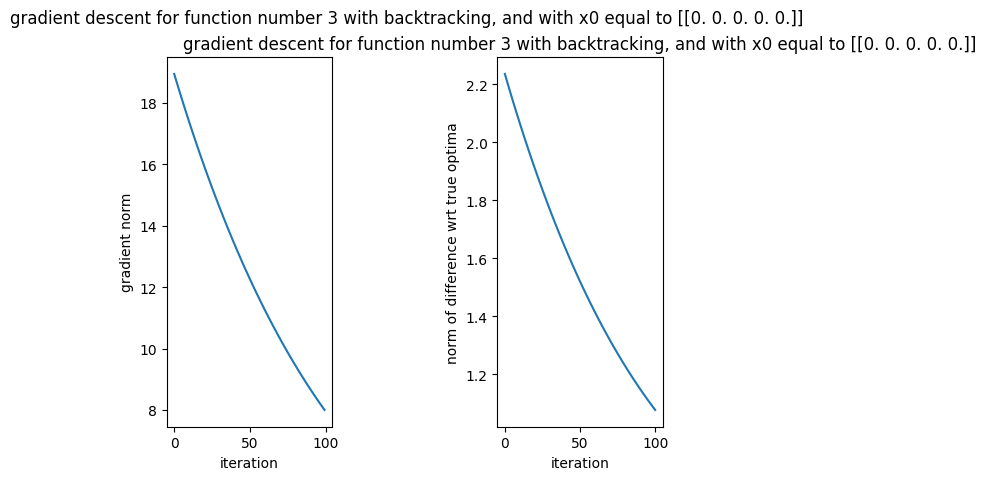

Not converged


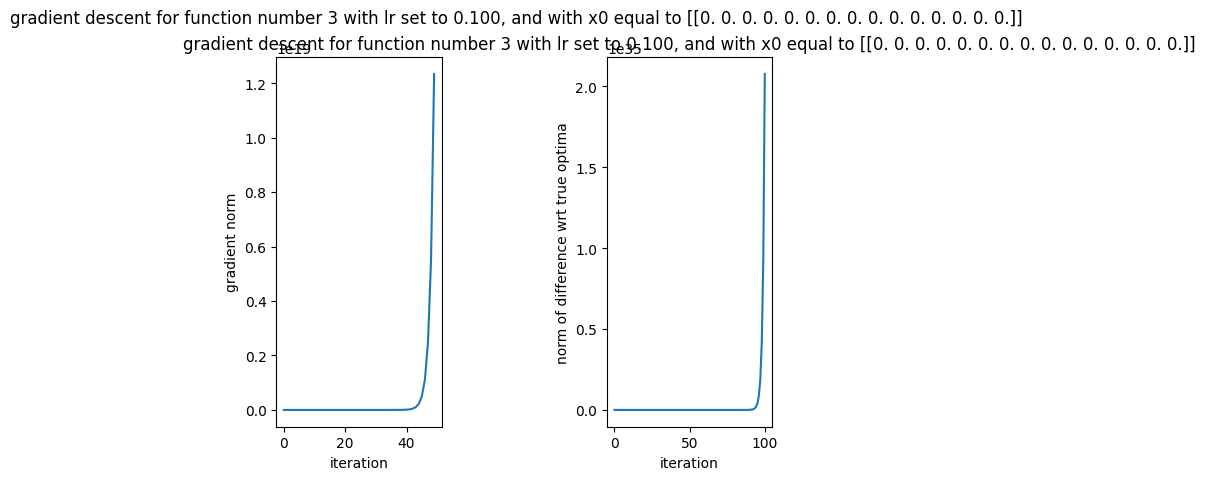

Not converged


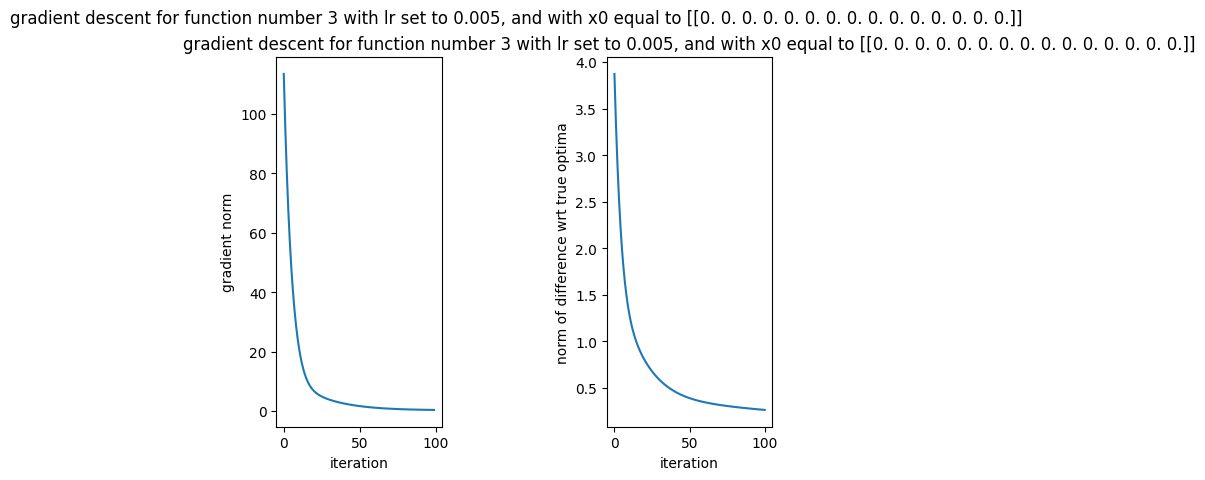

Not converged


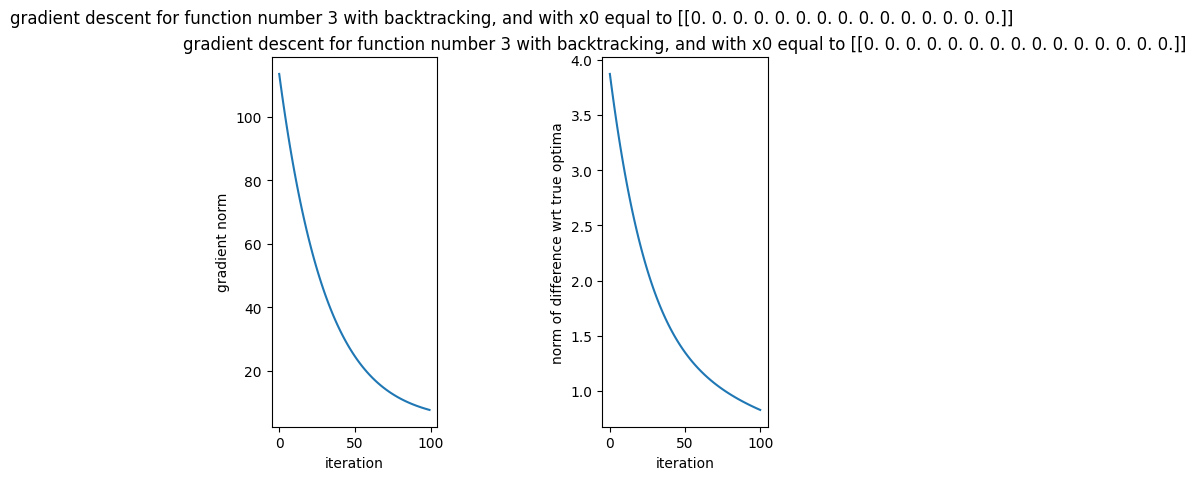

Converged in 56 steps


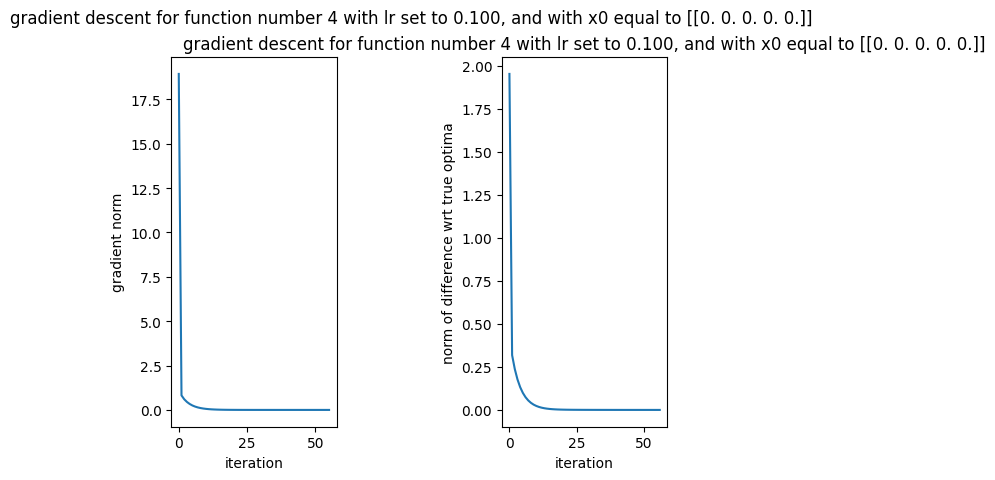

Not converged


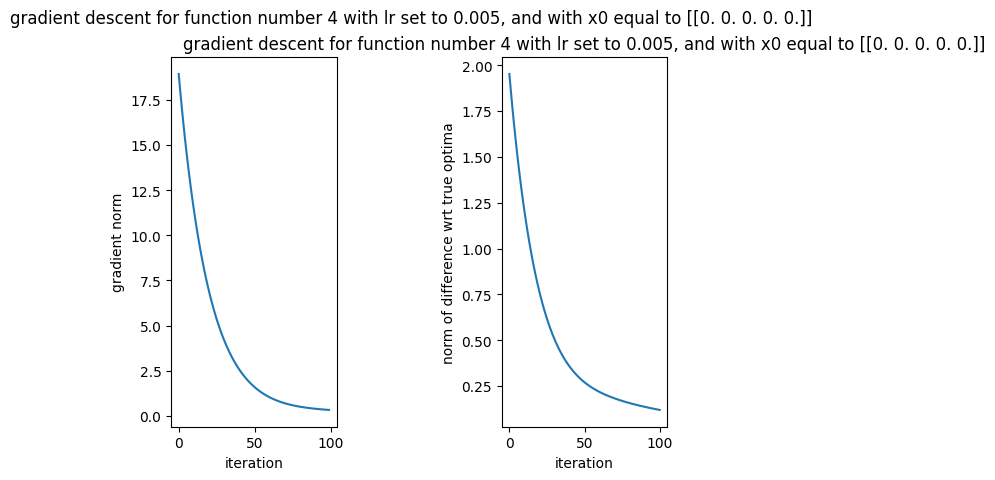

Not converged


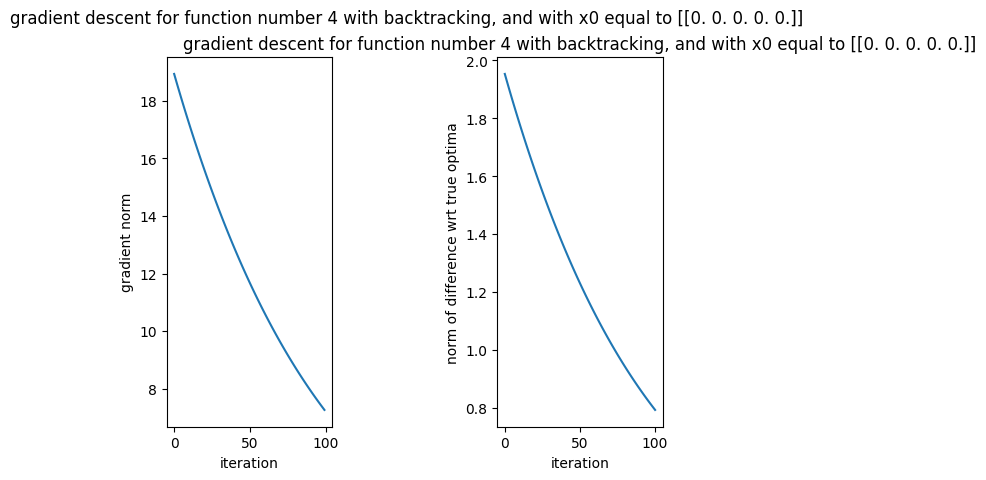

Not converged


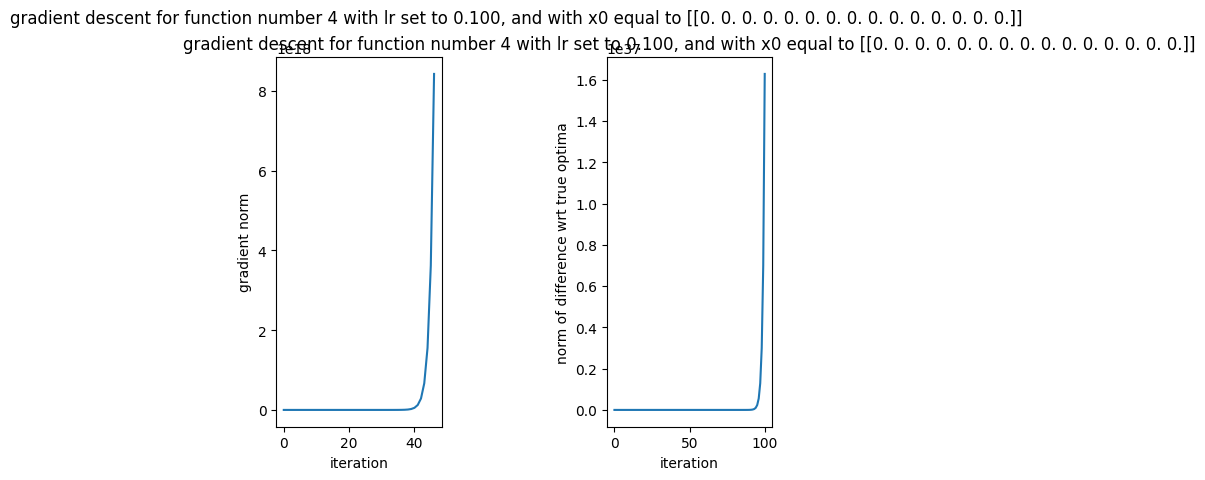

Not converged


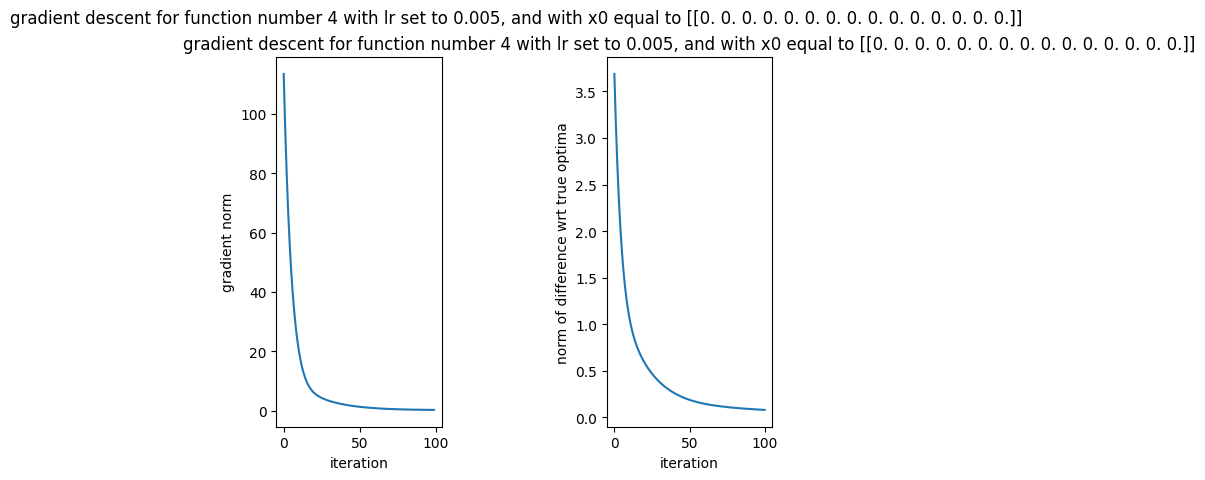

Not converged


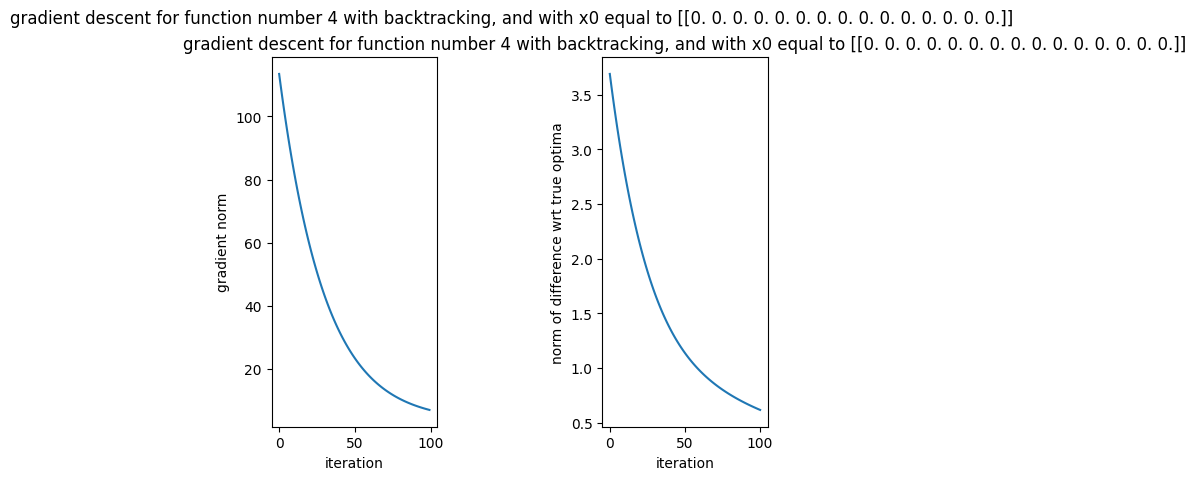

/tmp/ipykernel_47007/1188119123.py:56: RuntimeWarning: invalid value encountered in double_scalars
  return x[0]**4 + x[0]**3 - 2*x[0]**2 -2*x[0]
/tmp/ipykernel_47007/1188119123.py:59: RuntimeWarning: invalid value encountered in double_scalars
  return np.array([4 * x[0]**3 + 3*x[0]**2 - 4*x[0] - 2]).reshape(-1,1)


Not converged


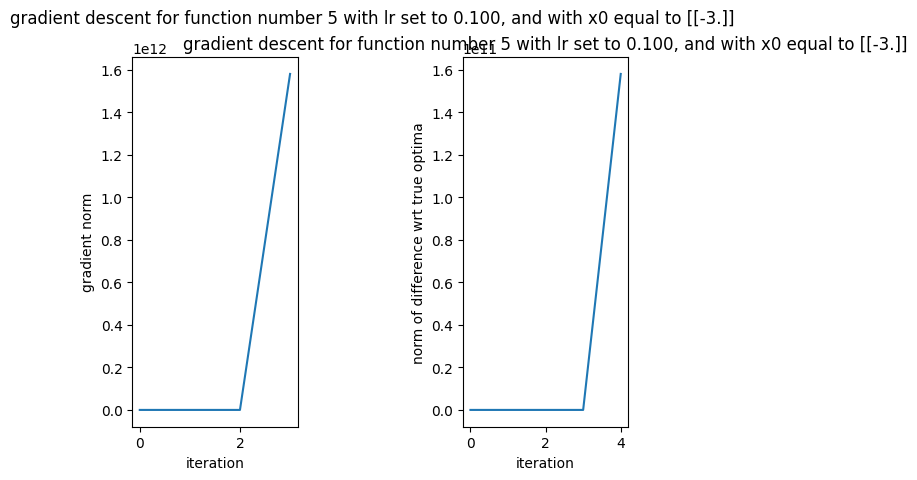

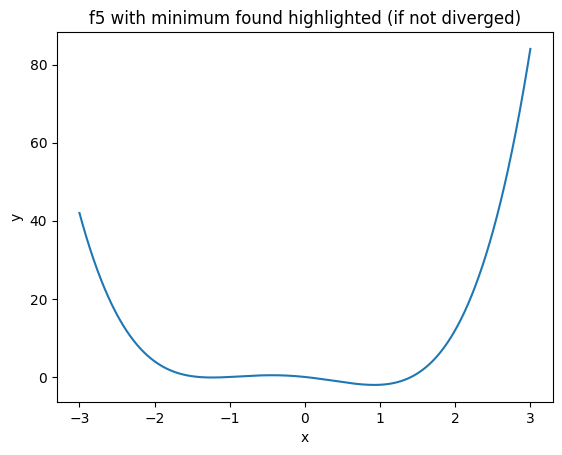

Not converged


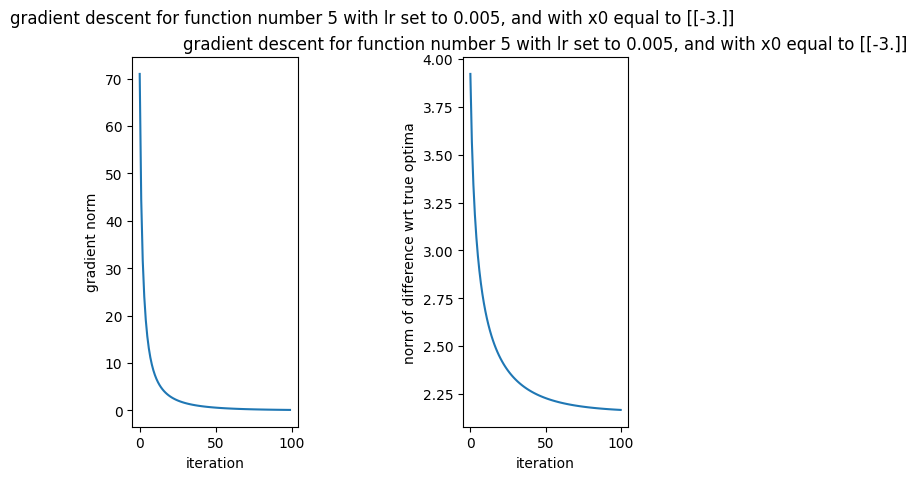

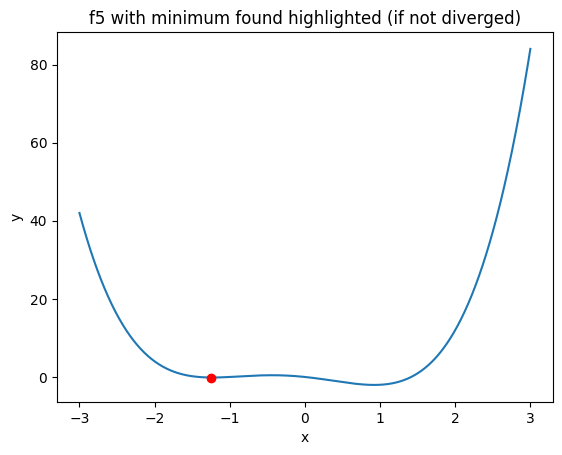

Not converged


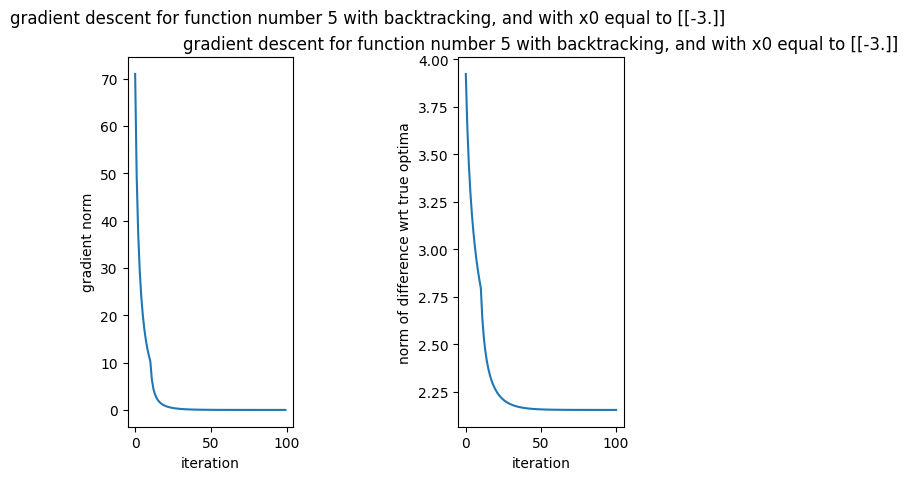

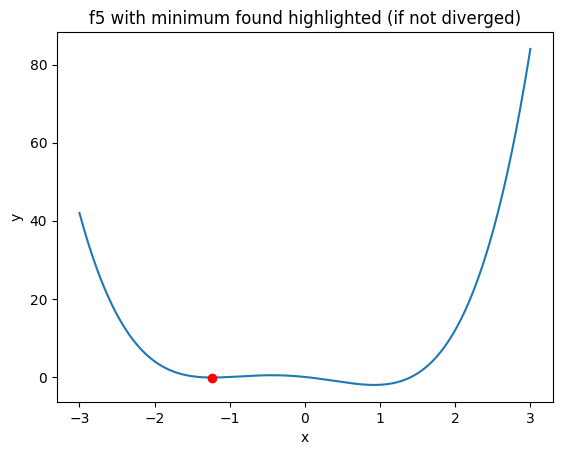

Converged in 10 steps


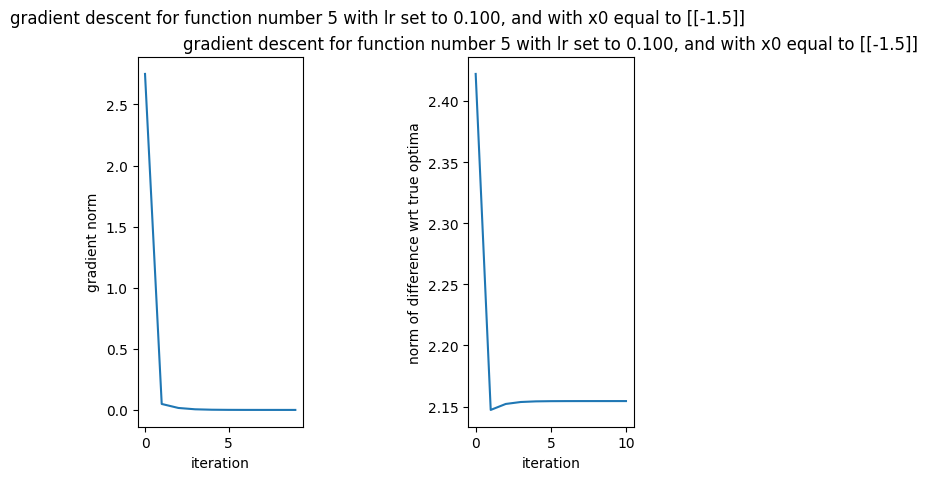

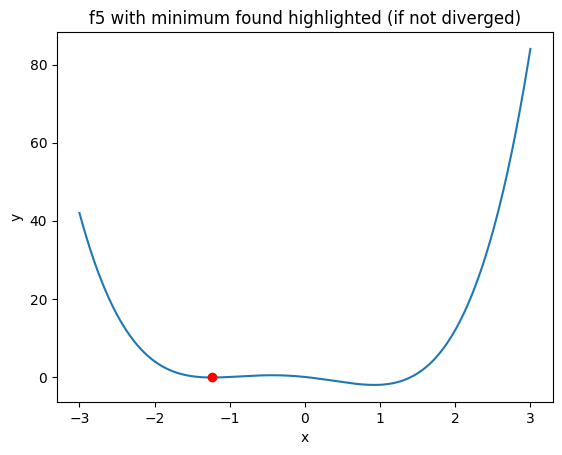

Not converged


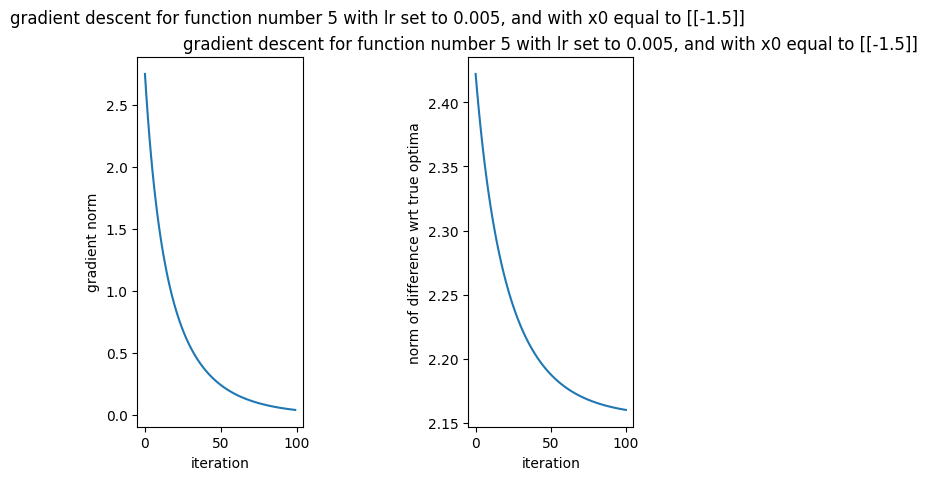

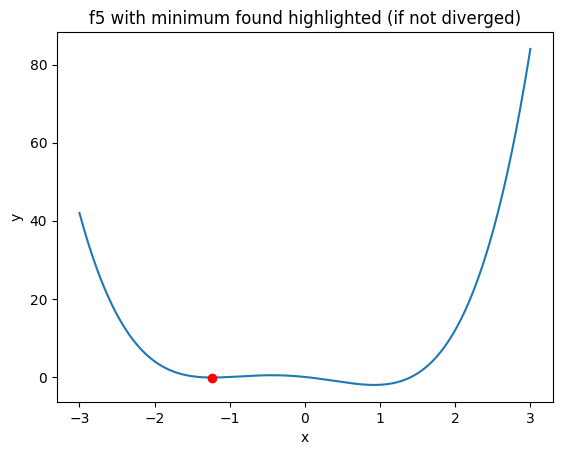

Converged in 88 steps


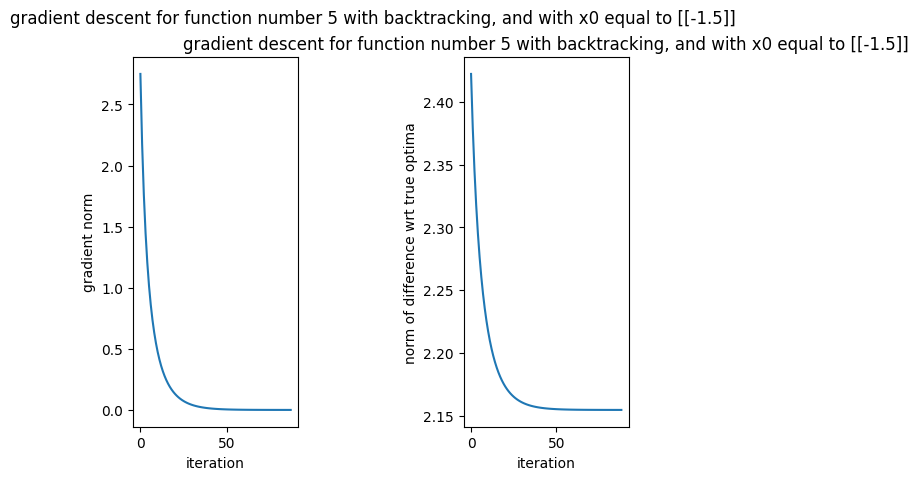

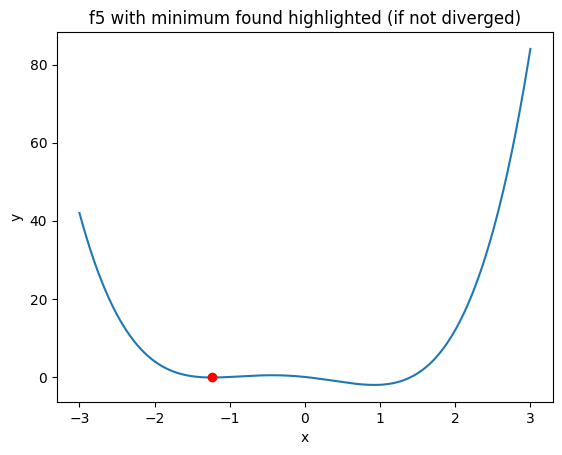

Converged in 11 steps


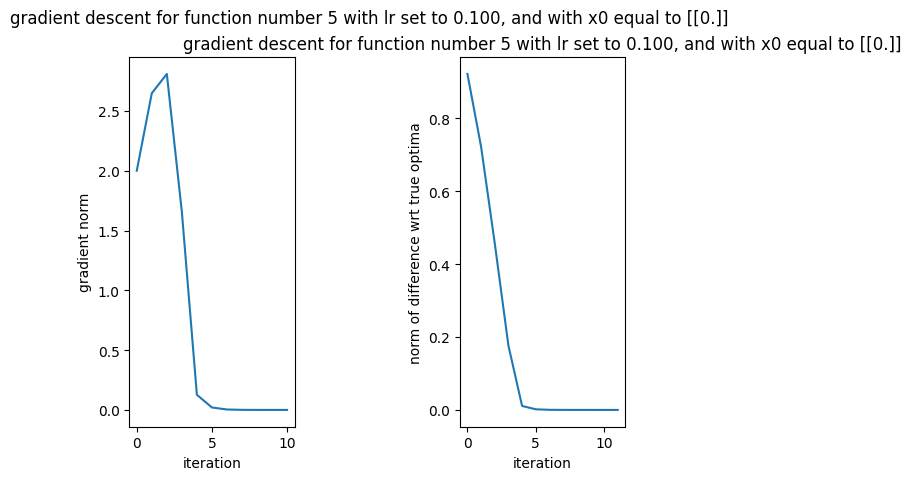

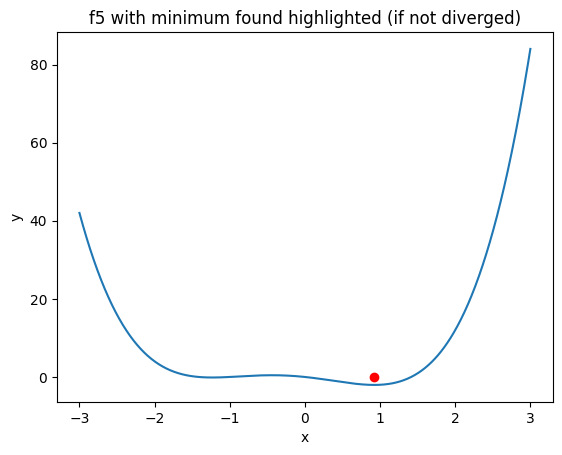

Not converged


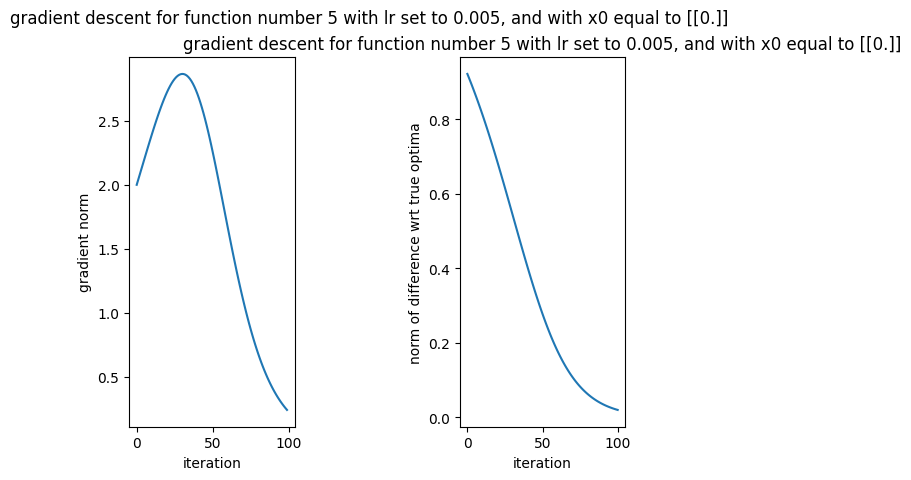

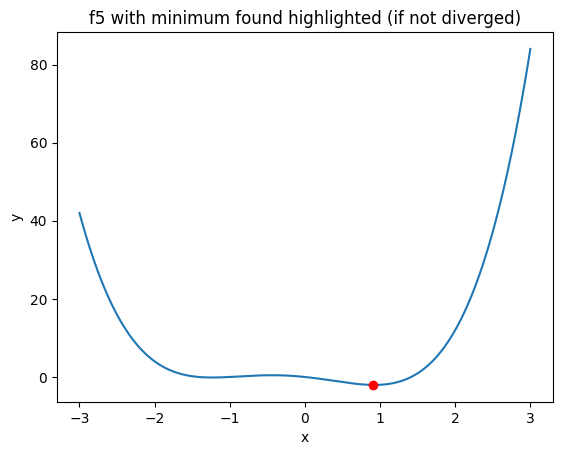

Converged in 59 steps


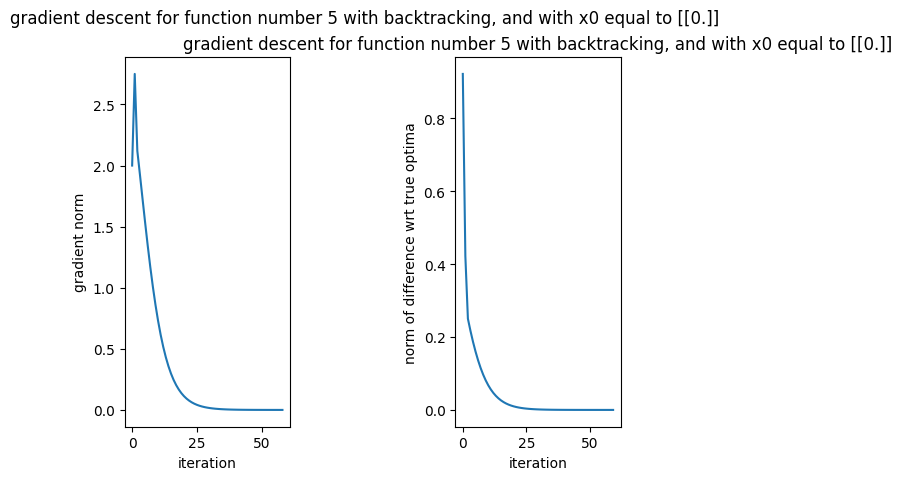

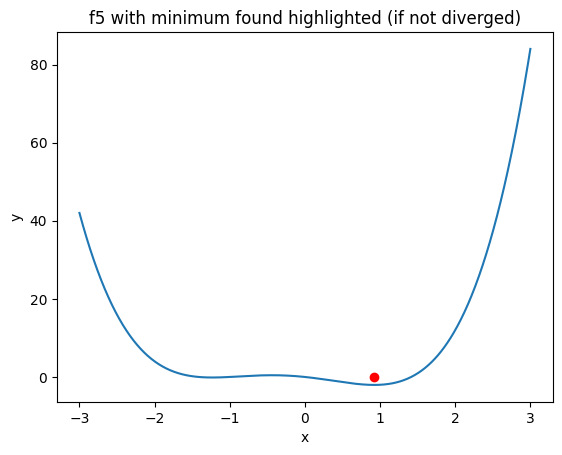

Converged in 10 steps


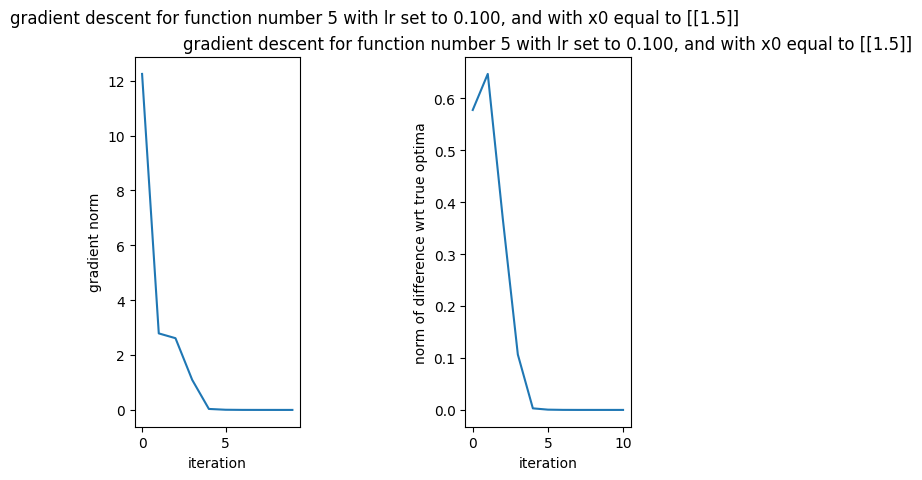

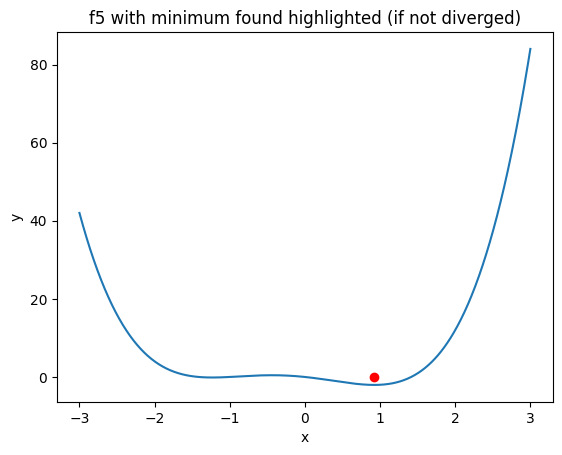

Not converged


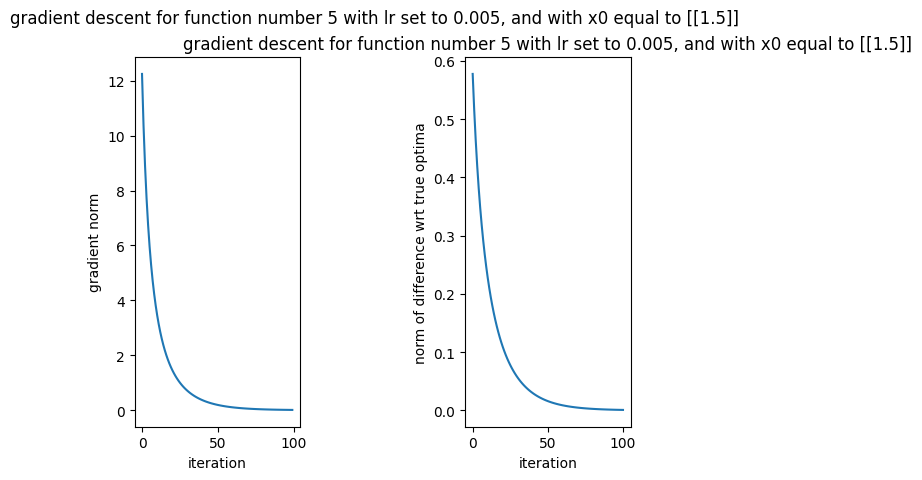

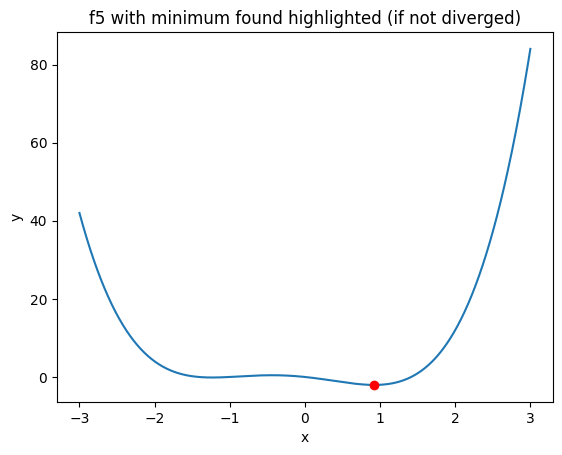

Converged in 58 steps


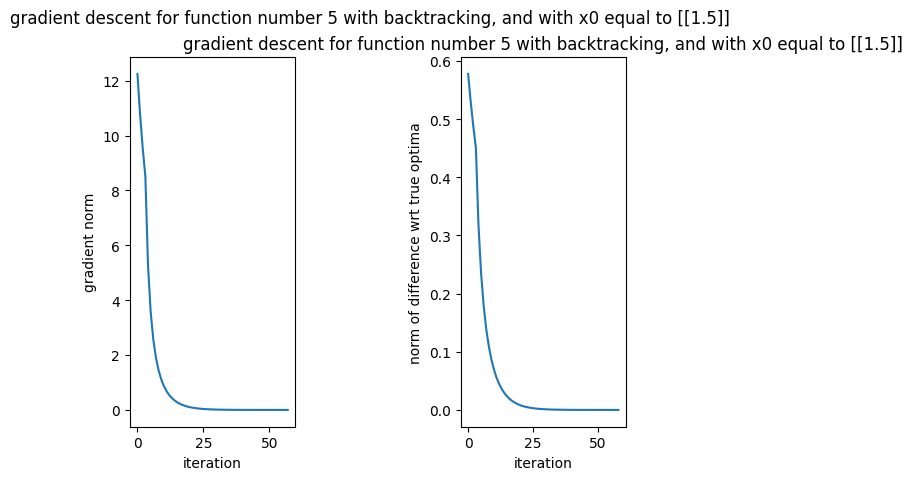

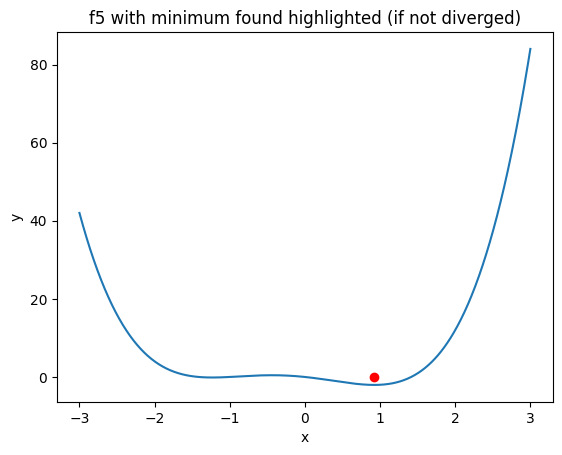

Not converged


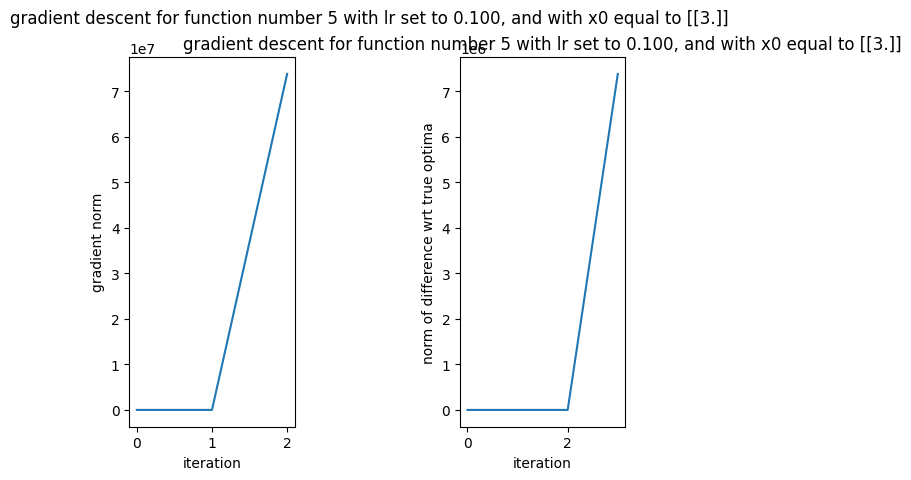

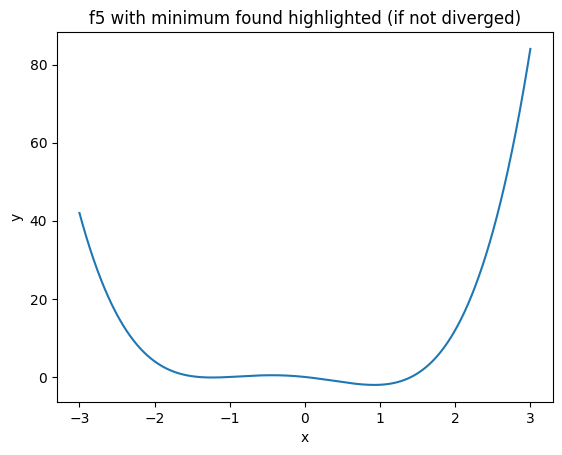

Not converged


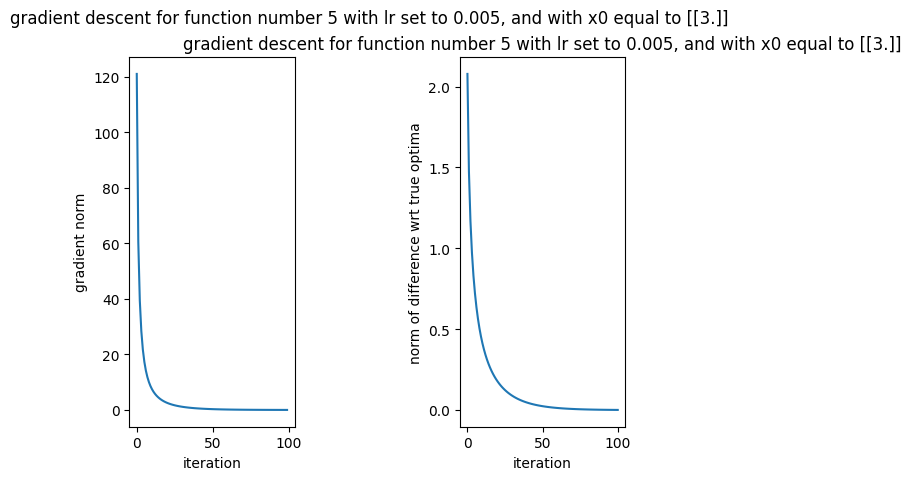

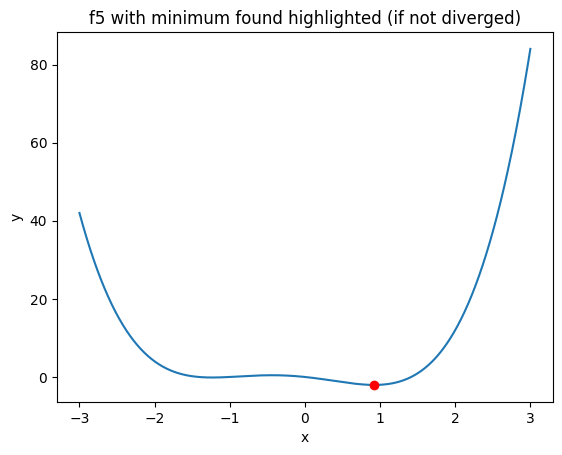

Converged in 65 steps


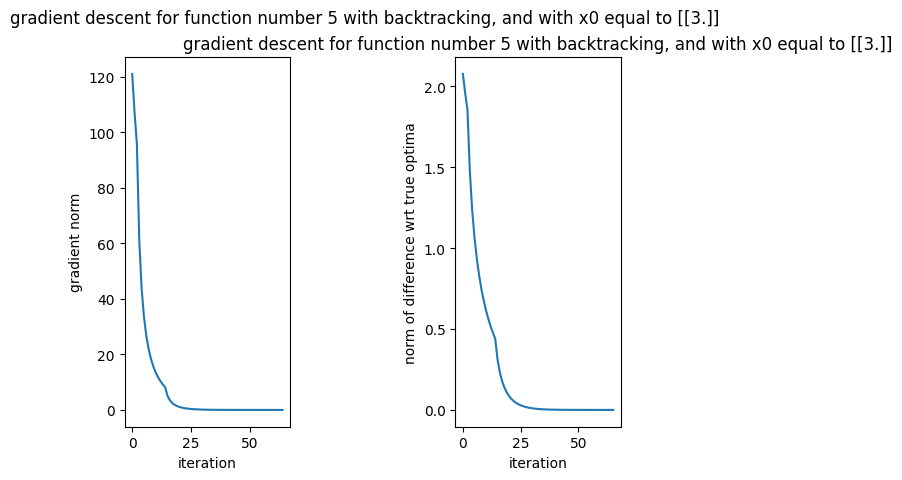

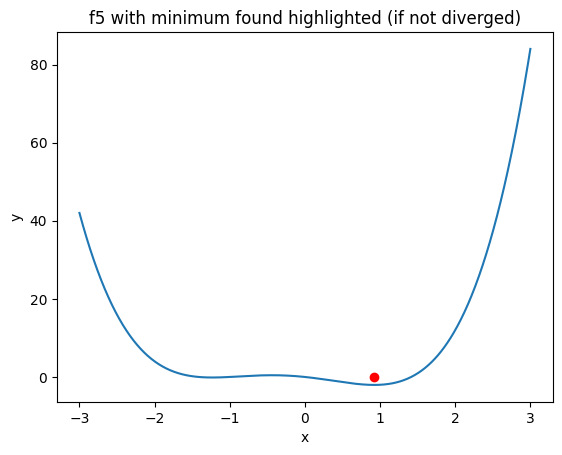

In [3]:
vect_f5 = np.vectorize(lambda x: x**4 + x**3 - 2*x**2 -2*x)
f5_x = np.linspace(-3, 3, 1000)
f5_y = vect_f5(f5_x)

for i in range(5):
    f, f_prime = functions[i]
    x0s = inputs[i]
    for idx, x0 in enumerate(x0s):
        for alpha in alphas:
            x_estimates, k, f_vals, grads, errs = gradientDescent(x0, f, f_prime, use_backtracking=False, alpha=alpha, kmax=kmax)
            if k is None:
                print("Not converged")
                k = kmax-1
            else:
                print("Converged in %d steps" % k)
                
            x_errs = np.einsum("ij,ij->i", x_estimates - true_xs[i][idx], x_estimates - true_xs[i][idx]) ** 0.5
            fig = plt.figure()
            plt.subplot(1, 2, 1)
            plt.xlabel("iteration")
            plt.ylabel("gradient norm")
            plt.plot(np.arange(len(grads)), errs)

            plt.subplot(1, 2, 2)
            plt.xlabel("iteration")
            plt.ylabel("norm of difference wrt true optima")
            plt.title("gradient descent for function number %d with lr set to %.3f, and with x0 equal to %s" % (i+1, alpha, str(x0)))
            plt.plot(np.arange(len(x_estimates)), x_errs)
            
            fig.subplots_adjust(wspace=1)
            plt.suptitle("gradient descent for function number %d with lr set to %.3f, and with x0 equal to %s" % (i+1, alpha, str(x0)))
            plt.show()
            if i == 4:
                plt.xlabel("x")
                plt.ylabel("y")
                plt.title("f5 with minimum found highlighted (if not diverged)")
                plt.plot(f5_x, f5_y)
                plt.plot(x_estimates[-1].tolist(), f_vals[-1].tolist(), 'ro')
                plt.show()
        
        x_estimates, k, f_vals, grads, errs = gradientDescent(x0, f, f_prime, use_backtracking=True, kmax=kmax)
        if k is None:
            print("Not converged")
            k = kmax-1
        else:
            print("Converged in %d steps" % k)
        x_errs = np.einsum("ij,ij->i", x_estimates - true_xs[i][idx], x_estimates - true_xs[i][idx]) ** 0.5
        fig = plt.figure()
        plt.subplot(1, 2, 1)
        plt.xlabel("iteration")
        plt.ylabel("gradient norm")
        plt.plot(np.arange(len(grads)), errs)

        plt.subplot(1, 2, 2)
        plt.xlabel("iteration")
        plt.ylabel("norm of difference wrt true optima")
        plt.title("gradient descent for function number %d with backtracking, and with x0 equal to %s" % (i+1, str(x0)))
        plt.plot(np.arange(len(x_estimates)), x_errs)
        
        fig.subplots_adjust(wspace=1)
        plt.suptitle("gradient descent for function number %d with backtracking, and with x0 equal to %s" % (i+1, str(x0)))
        plt.show()
        
        if i == 4:
            plt.xlabel("x")
            plt.ylabel("y")
            plt.title("f5 with minimum found highlighted (if not diverged)")
            plt.plot(f5_x, f5_y)
            plt.plot(x_estimates[-1].tolist(), f_vals[-1].tolist(), 'ro')
            plt.show()

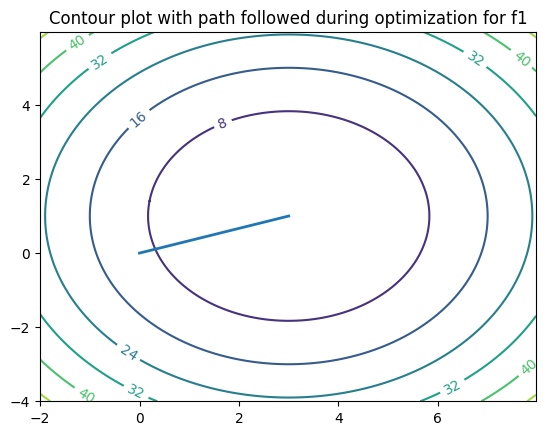

In [4]:
x_estimates, k, f_vals, grads, errs = gradientDescent(inputs[0][0], f_1, f_1_prime, use_backtracking=True, alpha=0.01, kmax=100)
gradientDescentPlot(f_x = f_1, x_1_range=(-2, 8), x_2_range=(-4, 6), step_size=.025, x_estimates=x_estimates, 
                    f_vals=f_vals, k=k, title="Contour plot with path followed during optimization for f1")

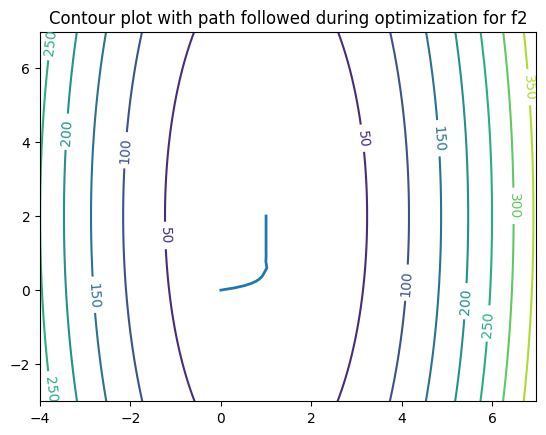

In [5]:
x_estimates, k, f_vals, grads, errs = gradientDescent(inputs[1][0], f_2, f_2_prime, use_backtracking=True, alpha=0.01, kmax=100)
gradientDescentPlot(f_x = f_2, x_1_range=(-4, 7), x_2_range=(-3, 7), step_size=.025, x_estimates=x_estimates, 
                    f_vals=f_vals, k=k, title="Contour plot with path followed during optimization for f2")

## Stochastic Gradient Descent

In [6]:
def stochasticGradientDescent(w0: np.ndarray, loss: typing.Callable, loss_gradient: typing.Callable,
                    data: typing.Tuple[np.ndarray, np.ndarray], lr: float = 1e-3, 
                    batch_size: int = 32, n_epochs: int = 100, verbose: bool = True):
    X, y = data
    n = y.shape[0]
    
    n_batchs = n // batch_size
    indexes = np.arange(n)
    
    w_estimates = np.zeros((n_epochs + 1,) + w0.shape, dtype=np.float32)
    w_estimates[0] = w0
    f_vals = np.zeros((n_epochs,), dtype=np.float32)
    grads = np.zeros((n_epochs,) + w0.shape, dtype=np.float32)
    errs = np.zeros((n_epochs,), dtype=np.float32)
    
    for i in range(n_epochs):
        if (i + 1) % 100 == 0 and verbose:
            print("Running epoch %d..." % (i + 1))
        np.random.shuffle(indexes)
        grad = 0.0
        for mb in range(n_batchs):
            mb_idxs = indexes[mb * batch_size : (mb + 1) * batch_size]
            grad += loss_gradient(w_estimates[i], X[mb_idxs, :], y[mb_idxs])
        
        f_vals[i] = loss(w_estimates[i], X, y)
        grads[i] = grad
        errs[i] = np.linalg.norm(grad, ord=2)    
        w_estimates[i+1] = w_estimates[i, :] - lr * grad
        
    return w_estimates, f_vals, grads, errs

In [7]:
def loadMNISTFromDisk(csv_filepath: str, digits_to_pick: typing.List[int], train_val_split: float = 0.7):
    dataset = pd.read_csv(csv_filepath)
    X = dataset.values[:,1:]
    y = dataset.values[:,0]

    idxs = np.where(np.isin(y, digits_to_pick))[0]
    X = X[idxs, :]
    y = y[idxs]

    n_train = int(len(y) * train_val_split)
    shuffled_indexes = np.arange(len(y))
    np.random.shuffle(shuffled_indexes)
    
    X_train, y_train = X[shuffled_indexes[:n_train], :], y[shuffled_indexes[:n_train]]
    X_test, y_test = X[shuffled_indexes[n_train:], :], y[shuffled_indexes[n_train:]]
    
    return (X_train, y_train), (X_test, y_test)

def mapLabelsToBinary(y: np.ndarray):
    unique_labels = np.unique(y)
    assert len(unique_labels) == 2, "The labels are not 2!"
    return {unique_labels[0]: 0, unique_labels[1]: 1}, np.where(y == unique_labels[0], 0, 1)

In [8]:
(X_train, y_train), (X_test, y_test) = loadMNISTFromDisk("../Homework_2/data.csv", [1,7], 0.50)
labels_mapping, y_train = mapLabelsToBinary(y_train)
y_test = np.vectorize(labels_mapping.__getitem__)(y_test)

#Scale datasets
X_train, X_test = X_train / 255, X_test / 255

In [9]:
def logisticRegression(w: np.ndarray, x: np.ndarray) -> np.ndarray:
    return sigmoid(w @ x.T)

def logisticRegressionLoss(w: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    y_pred = sigmoid(w @ x.T)
    return mse(y_pred, y)

def logisticRegressionLossGradient(w: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    y_pred = sigmoid(w @ x.T)
    return ((y_pred * (1 - y_pred) * (y_pred - y)) @ x) * (1 / x.shape[0])

def sigmoid(x: np.ndarray) -> np.ndarray:
    return np.where(
            x >= 0,
            1 / (1 + np.exp(-x)),
            np.exp(x) / (1 + np.exp(x))
    )
    
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.dot((y_true - y_pred), (y_true - y_pred).T) / y_true.shape[0]

In [10]:
w0 = np.random.normal(loc=0.0, scale=1.0, size=(1, X_train.shape[1]))
w_estimates_sgd, f_vals_sgd, grads_sgd, errs_sgd = stochasticGradientDescent(w0, logisticRegressionLoss, 
                                                                             logisticRegressionLossGradient, 
                                                                             (X_train, y_train), lr=1e-1, 
                                                                             n_epochs=2000, batch_size=92)

Running epoch 100...
Running epoch 200...
Running epoch 300...
Running epoch 400...
Running epoch 500...
Running epoch 600...
Running epoch 700...
Running epoch 800...
Running epoch 900...
Running epoch 1000...
Running epoch 1100...
Running epoch 1200...
Running epoch 1300...
Running epoch 1400...
Running epoch 1500...
Running epoch 1600...
Running epoch 1700...
Running epoch 1800...
Running epoch 1900...
Running epoch 2000...


In [11]:
y_train_pred_sgd = logisticRegression(w_estimates_sgd[-1], X_train)
y_train_pred_sgd[y_train_pred_sgd >= 0.5] = 1
y_train_pred_sgd[y_train_pred_sgd < 0.5] = 0

y_test_pred_sgd = logisticRegression(w_estimates_sgd[-1], X_test)
y_test_pred_sgd[y_test_pred_sgd >= 0.5] = 1
y_test_pred_sgd[y_test_pred_sgd < 0.5] = 0

In [12]:
print(accuracy_score(y_train_pred_sgd.reshape(-1), y_train))
print(accuracy_score(y_test_pred_sgd.reshape(-1), y_test))

0.996257155438133
0.9909751265683469


In [13]:
w0 = np.random.normal(loc=0.0, scale=1.0, size=(1, X_train.shape[1]))
loss_gd = lambda w_estimate : logisticRegressionLoss(w_estimate, X_train, y_train)
loss_gradient_gd = lambda w_estimate : logisticRegressionLossGradient(w_estimate, X_train, y_train)
w_estimates_gd, k_gd, f_vals_gd, grads_gd, errs_gd = gradientDescent(w0, loss_gd, loss_gradient_gd, 
                                                                     kmax=2000, use_backtracking=True, verbose=True)

Running iteration 100
Running iteration 200
Running iteration 300
Running iteration 400
Running iteration 500
Running iteration 600
Running iteration 700
Running iteration 800
Running iteration 900
Running iteration 1000
Running iteration 1100
Running iteration 1200
Running iteration 1300
Running iteration 1400
Running iteration 1500
Running iteration 1600
Running iteration 1700
Running iteration 1800
Running iteration 1900
Running iteration 2000


In [14]:
y_train_pred_gd = logisticRegression(w_estimates_gd[-1], X_train)
y_train_pred_gd[y_train_pred_gd >= 0.5] = 1
y_train_pred_gd[y_train_pred_gd < 0.5] = 0

y_test_pred_gd = logisticRegression(w_estimates_gd[-1], X_test)
y_test_pred_gd[y_test_pred_gd >= 0.5] = 1
y_test_pred_gd[y_test_pred_gd < 0.5] = 0

In [15]:
print(accuracy_score(y_train_pred_gd, y_train))
print(accuracy_score(y_test_pred_gd, y_test))

0.9903126376045794
0.9856922738278671


In [16]:
def multiClassLogisticRegression(w: np.ndarray, x: np.ndarray) -> np.ndarray:
    """
    Parameters
    ----------
    w : np.ndarray[float]
        The weights, of shape (D, K), where D is
        the dimensionality of the dataset and K is 
        the number of classes
    x : np.ndarray[float]
        The dataset, of shape (N, D), where N is 
        the number of observations
    
    Returns
    -------
    np.ndarray[float]
        The array with predictions, of shape (N, K)
    """
    return softmax(x @ w)

def multiClassLogisticRegressionLoss(w: np.ndarray, x: np.ndarray, y: np.ndarray) -> float:
    probs = softmax(x @ w)
    true_class_logprobs = -np.log(probs[np.arange(x.shape[0]), y])
    return np.sum(true_class_logprobs) / x.shape[0]

def multiClassLogisticRegressionLossGradient(w: np.ndarray, x: np.ndarray, y: np.ndarray) -> np.ndarray:
    probs = softmax(x @ w)
    probs[np.arange(x.shape[0]),y] -= 1
    probs /= x.shape[0]

    return x.T.dot(probs)

def softmax(scores: np.ndarray):
    exp_scores = np.exp(scores - np.max(scores, axis=1, keepdims=True))
    probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

    return probs
    
def mse(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    return np.dot((y_true - y_pred), (y_true - y_pred).T) / y_true.shape[0]

In [17]:
labels = [1, 4, 5, 6]
labels_mapping = {labels[i]: i for i in range(len(labels))}

(X_train, y_train), (X_test, y_test) = loadMNISTFromDisk("../Homework_2/data.csv", labels, 0.75)
y_train = np.vectorize(labels_mapping.__getitem__)(y_train)
y_test = np.vectorize(labels_mapping.__getitem__)(y_test)

#Scale datasets
X_train, X_test = X_train / 255, X_test / 255

In [18]:
w0 = np.random.normal(loc=0.0, scale=1.0, size=(X_train.shape[1], len(labels)))
w_estimates_sgd, f_vals_sgd, grads_sgd, errs_sgd = stochasticGradientDescent(w0, multiClassLogisticRegressionLoss, 
                                                                             multiClassLogisticRegressionLossGradient, 
                                                                             (X_train, y_train), lr=1e-2, 
                                                                             n_epochs=1000, batch_size=100, verbose=True)

Running epoch 100...
Running epoch 200...
Running epoch 300...
Running epoch 400...
Running epoch 500...
Running epoch 600...
Running epoch 700...
Running epoch 800...
Running epoch 900...
Running epoch 1000...


In [19]:
y_train_pred_mclr = np.argmax(multiClassLogisticRegression(w_estimates_sgd[-1], X_train), axis=1)
y_test_pred_mclr = np.argmax(multiClassLogisticRegression(w_estimates_sgd[-1], X_test), axis=1)

In [20]:
print(accuracy_score(y_train_pred_mclr, y_train))
print(accuracy_score(y_test_pred_mclr, y_test))

0.9761904761904762
0.9606903163950143
